## Technical Analysis: Ichimoku Indicator 

The Ichimoku (One Look) is considered an all in one indicator. It provides information on momentum, support and resistance. It is made up of 5 lines. If you are a short term trader you create 1 minute or 6 hours. Long term traders focus on day or weekly data. 

- Conversion Line (Tenkan-sen): Represents support, resistance and reversals. Used to measure short term trends.
- Baseline (Kijun-sen): Represents support, resistance and confirms trend changes. Allows you to evaluate the strength of medium term trends. Called the baseline because it lags the price.
- Leading Span A (Senkou A): Used to identify future areas of support and resistance.
- Leading Span B (Senkou B): Other line used to identify suture support and resistance.
- Lagging Span (Chikou): Shows possible support and resistance. It is used to confirm signals obtained from other lines.
- Cloud (Kumo): Space between Span A and B. Represents the divergence in price evolution.

Formulas

- Lagging Span = price shifted back 26 periods
- Base Line = (Highest value in period + Lowest value in period)/2 (26 sessions)
- Conversion Line = (Highest value in period + Lowest value in period)/2 (9 sessions)
- Leading Span A = (Conversion Value + Base Value)/2 (26 Sessions)
- Leading Span B = (Conversion Value + Base Value)/2 (52 Sessions)

### Importing libraries

In [1]:
# provides ways to work with large multidimensional arrays
import numpy as np
# Allows for further data manipulation and analysis
import pandas as pd

import yfinance as yf
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import cufflinks as cf
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)


from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go

# TA-Lib is used by traders to perform technical analysis
import talib as ta

### Download Stock Data

* Valid periods: 1d, 5d, 2y, 5y, 10y, ytd, max
* Valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [2]:
amd_df = yf.download(tickers="AMD", period="1y", interval="1d")
amd_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-29,112.070000,112.760002,109.839996,111.239998,111.239998,58347200
2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900
2023-07-03,115.160004,116.730003,114.510002,115.820000,115.820000,31860000
2023-07-05,116.099998,117.660004,113.860001,113.949997,113.949997,49501600
2023-07-06,112.070000,113.790001,110.309998,113.480003,113.480003,42342000
...,...,...,...,...,...,...
2024-06-24,159.750000,163.399994,158.190002,160.250000,160.250000,45954100
2024-06-25,160.729996,161.000000,156.449997,160.250000,160.250000,40975300
2024-06-26,160.600006,160.740005,156.000000,157.539993,157.539993,36973400


### Conversion Line (Tenkan-Sen)

- Conversion Line = (Highest value in period + Lowest value in period)/2 (9 sessions)

In [3]:
hi_val = amd_df['High'].rolling(window=9).max()
low_val = amd_df['Low'].rolling(window=9).min()
amd_df['Conversion'] = (hi_val+low_val)/2
amd_df

,Open,High,Low,Close,Adj Close,Volume,Conversion
Date,,,,,,,
2023-06-29,112.070000,112.760002,109.839996,111.239998,111.239998,58347200,NaN
2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900,NaN
2023-07-03,115.160004,116.730003,114.510002,115.820000,115.820000,31860000,NaN
2023-07-05,116.099998,117.660004,113.860001,113.949997,113.949997,49501600,NaN
2023-07-06,112.070000,113.790001,110.309998,113.480003,113.480003,42342000,NaN
...,...,...,...,...,...,...,...
2024-06-24,159.750000,163.399994,158.190002,160.250000,160.250000,45954100,160.080002
2024-06-25,160.729996,161.000000,156.449997,160.250000,160.250000,40975300,160.080002
2024-06-26,160.600006,160.740005,156.000000,157.539993,157.539993,36973400,160.080002


### Baseline (kijun-sen)

In [4]:
# Base Line = (Highest value in period + Lowest value in period)/2 (26 sessions)
hi_val2 = amd_df['High'].rolling(window=26).max()
low_val2 = amd_df['Low'].rolling(window=26).min()
amd_df['Baseline'] = (hi_val2 + low_val2) / 2
amd_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline
Date,,,,,,,,
2023-06-29,112.070000,112.760002,109.839996,111.239998,111.239998,58347200,NaN,NaN
2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900,NaN,NaN
2023-07-03,115.160004,116.730003,114.510002,115.820000,115.820000,31860000,NaN,NaN
2023-07-05,116.099998,117.660004,113.860001,113.949997,113.949997,49501600,NaN,NaN
2023-07-06,112.070000,113.790001,110.309998,113.480003,113.480003,42342000,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-24,159.750000,163.399994,158.190002,160.250000,160.250000,45954100,160.080002,163.945
2024-06-25,160.729996,161.000000,156.449997,160.250000,160.250000,40975300,160.080002,163.945
2024-06-26,160.600006,160.740005,156.000000,157.539993,157.539993,36973400,160.080002,163.945


### Leading Span A (Senkou A)

In [5]:
# Leading Span A = (Conversion Value + Base Value)/2 (26 Sessions)
amd_df['SpanA'] = ((amd_df['Conversion'] + amd_df['Baseline'])/2).shift(26)
amd_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA
Date,,,,,,,,,
2023-06-29,112.070000,112.760002,109.839996,111.239998,111.239998,58347200,NaN,NaN,NaN
2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900,NaN,NaN,NaN
2023-07-03,115.160004,116.730003,114.510002,115.820000,115.820000,31860000,NaN,NaN,NaN
2023-07-05,116.099998,117.660004,113.860001,113.949997,113.949997,49501600,NaN,NaN,NaN
2023-07-06,112.070000,113.790001,110.309998,113.480003,113.480003,42342000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-06-24,159.750000,163.399994,158.190002,160.250000,160.250000,45954100,160.080002,163.945,154.760002
2024-06-25,160.729996,161.000000,156.449997,160.250000,160.250000,40975300,160.080002,163.945,157.237499
2024-06-26,160.600006,160.740005,156.000000,157.539993,157.539993,36973400,160.080002,163.945,157.345001


### Leading Span B (Senkou B)

In [6]:
# Leading Span B = (Conversion Value + Base Value)/2 (52 Sessions)
hi_val3 = amd_df['High'].rolling(window=52).max()
low_val3 = amd_df['Low'].rolling(window=52).min()
amd_df['SpanB'] = ((hi_val3 + low_val3)/2).shift(26)
amd_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA,SpanB
Date,,,,,,,,,,
2023-06-29,112.070000,112.760002,109.839996,111.239998,111.239998,58347200,NaN,NaN,NaN,NaN
2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900,NaN,NaN,NaN,NaN
2023-07-03,115.160004,116.730003,114.510002,115.820000,115.820000,31860000,NaN,NaN,NaN,NaN
2023-07-05,116.099998,117.660004,113.860001,113.949997,113.949997,49501600,NaN,NaN,NaN,NaN
2023-07-06,112.070000,113.790001,110.309998,113.480003,113.480003,42342000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-06-24,159.750000,163.399994,158.190002,160.250000,160.250000,45954100,160.080002,163.945,154.760002,184.230003
2024-06-25,160.729996,161.000000,156.449997,160.250000,160.250000,40975300,160.080002,163.945,157.237499,184.230003
2024-06-26,160.600006,160.740005,156.000000,157.539993,157.539993,36973400,160.080002,163.945,157.345001,184.230003


### Lagging Span (Chikou)

In [7]:
amd_df['Lagging'] = amd_df['Close'].shift(-26)
amd_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA,SpanB,Lagging
Date,,,,,,,,,,,
2023-06-29,112.070000,112.760002,109.839996,111.239998,111.239998,58347200,NaN,NaN,NaN,NaN,116.809998
2023-06-30,113.029999,114.690002,112.410004,113.910004,113.910004,53331900,NaN,NaN,NaN,NaN,113.230003
2023-07-03,115.160004,116.730003,114.510002,115.820000,115.820000,31860000,NaN,NaN,NaN,NaN,110.470001
2023-07-05,116.099998,117.660004,113.860001,113.949997,113.949997,49501600,NaN,NaN,NaN,NaN,110.230003
2023-07-06,112.070000,113.790001,110.309998,113.480003,113.480003,42342000,NaN,NaN,NaN,NaN,107.570000
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,159.750000,163.399994,158.190002,160.250000,160.250000,45954100,160.080002,163.945,154.760002,184.230003,NaN
2024-06-25,160.729996,161.000000,156.449997,160.250000,160.250000,40975300,160.080002,163.945,157.237499,184.230003,NaN
2024-06-26,160.600006,160.740005,156.000000,157.539993,157.539993,36973400,160.080002,163.945,157.345001,184.230003,NaN


### Candlesticks

In [8]:
candle = go.Candlestick(x=amd_df.index, open=amd_df['Open'], high=amd_df['High'], low=amd_df['Low'], 
                        close=amd_df['Close'], name='Candlestick')

In [9]:
def get_fill_color(label):
    if label >= 1:
        return 'rgba(0, 250, 0, 0.4)'
    else:
        return 'rgba(250, 0, 0, 0.4)'

### Plot

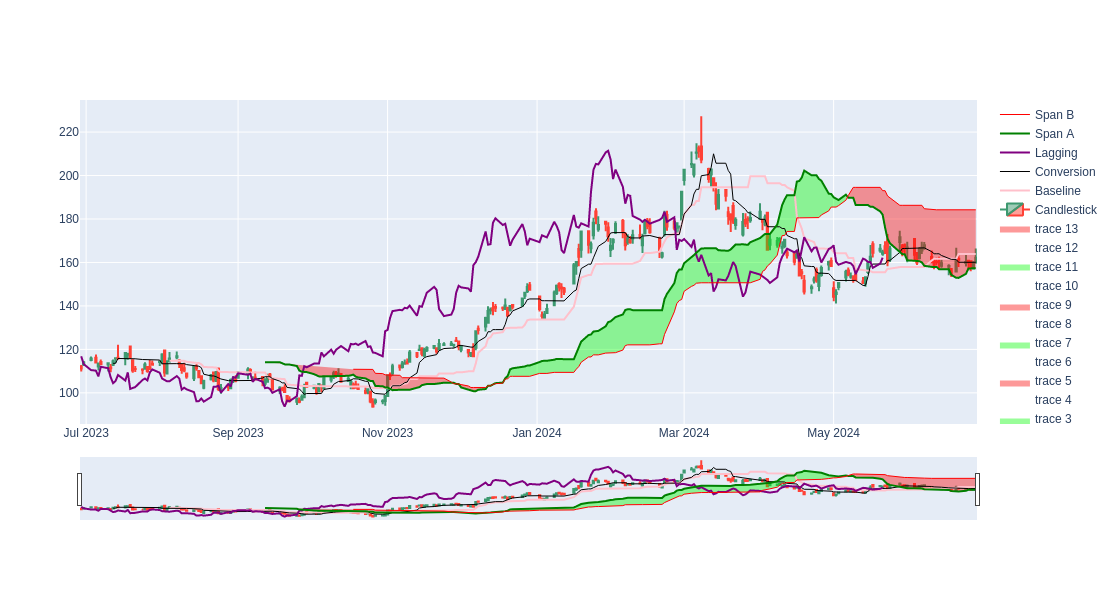

In [10]:
df1 = amd_df.copy()
fig = go.Figure()

amd_df['label'] = np.where(amd_df['SpanA'] > amd_df['SpanB'], 1, 0)

amd_df['group'] = amd_df['label'].ne(amd_df['label'].shift()).cumsum()
amd_df = amd_df.groupby('group')
dfs = []

for name, data in amd_df:
    dfs.append(data)

for df in dfs:
    fig.add_traces(go.Scatter(x=df.index, y=df.SpanA, 
                              line=dict(color='rgba(0,0,0,0)')))
    fig.add_traces(go.Scatter(x=df.index, y=df.SpanB, 
                              line=dict(color='rgba(0,0,0,0)'), fill='tonexty', fillcolor=get_fill_color(df['label'].iloc[0])))
baseline = go.Scatter(x=df1.index, y=df1['Baseline'], line=dict(color='pink', width=2), name="Baseline")

conversion = go.Scatter(x=df1.index, y=df1['Conversion'], line=dict(color='black', width=1), name="Conversion")

lagging = go.Scatter(x=df1.index, y=df1['Lagging'], line=dict(color='purple', width=2), name="Lagging")

span_a = go.Scatter(x=df1.index, y=df1['SpanA'], line=dict(color='green', width=2), name="Span A")

span_b = go.Scatter(x=df1.index, y=df1['SpanB'], line=dict(color='red', width=1), name="Span B")

fig.add_trace(candle)
fig.add_trace(baseline)
fig.add_trace(conversion)
fig.add_trace(lagging)
fig.add_trace(span_a)
fig.add_trace(span_b)

fig.update_layout(height=600, width=1000, showlegend=True)
fig.show()

### What the lines mean

- Lagging span: When above the price it is bullish and when below bearish. It is used with other indicators because it is mainly a filter.
- Baseline: When below price this is considered support. When above price this is considered resistance. We are in an uptrend when the slope increases and vice versa. The slope of the curve tells us the strength of the trend.
- Conversion: We focus on its position versus the Baseline. When the Conversion crosses above the Baseline we are in an upward trend and vice versa. This is considered a strong indicator when above the Cloud and weak when below.
- Cloud: The thicker the Cloud, the stronger the trend and vice versa. When the Spans cross many times we are in a range. When they cross this is a sign of a reversal of trend. 

### Get Ichimoku function

In [13]:
def get_Ichimoku(ticker):
    df = yf.download(tickers=ticker, period="1y", interval="1d")

    # Conversion
    hi_val = df['High'].rolling(window=9).max()
    low_val = df['Low'].rolling(window=9).min()
    df['Conversion'] = (hi_val+low_val)/2
    # Baseline
    hi_val2 = df['High'].rolling(window=26).max()
    low_val2 = df['Low'].rolling(window=26).min()
    df['Baseline'] = (hi_val2 + low_val2) / 2
    # Spans
    df['SpanA'] = ((df['Conversion'] + df['Baseline'])/2).shift(26)
    hi_val3 = df['High'].rolling(window=52).max()
    low_val3 = df['Low'].rolling(window=52).min()
    df['SpanB'] = ((hi_val3 + low_val3)/2).shift(26)
    df['Lagging'] = df['Close'].shift(-26)
    # Candlestick
    candle = go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], 
                        close=df['Close'], name='Candlestick')

    # Plotting
    df1 = df.copy()
    fig = go.Figure()
    
    df['label'] = np.where(df['SpanA'] > df['SpanB'], 1, 0)
    
    df['group'] = df['label'].ne(df['label'].shift()).cumsum()
    df = df.groupby('group')
    dfs = []
    
    for name, data in amd_df:
        dfs.append(data)
    
    for df in dfs:
        fig.add_traces(go.Scatter(x=df.index, y=df.SpanA, 
                                  line=dict(color='rgba(0,0,0,0)')))
        fig.add_traces(go.Scatter(x=df.index, y=df.SpanB, 
                                  line=dict(color='rgba(0,0,0,0)'), fill='tonexty', fillcolor=get_fill_color(df['label'].iloc[0])))
    baseline = go.Scatter(x=df1.index, y=df1['Baseline'], line=dict(color='pink', width=2), name="Baseline")
    
    conversion = go.Scatter(x=df1.index, y=df1['Conversion'], line=dict(color='black', width=1), name="Conversion")
    
    lagging = go.Scatter(x=df1.index, y=df1['Lagging'], line=dict(color='purple', width=2), name="Lagging")
    
    span_a = go.Scatter(x=df1.index, y=df1['SpanA'], line=dict(color='green', width=2), name="Span A")
    
    span_b = go.Scatter(x=df1.index, y=df1['SpanB'], line=dict(color='red', width=1), name="Span B")
    
    fig.add_trace(candle)
    fig.add_trace(baseline)
    fig.add_trace(conversion)
    fig.add_trace(lagging)
    fig.add_trace(span_a)
    fig.add_trace(span_b)
    
    fig.update_layout(height=600, width=1000, showlegend=True)
    fig.show()

[*********************100%%**********************]  1 of 1 completed


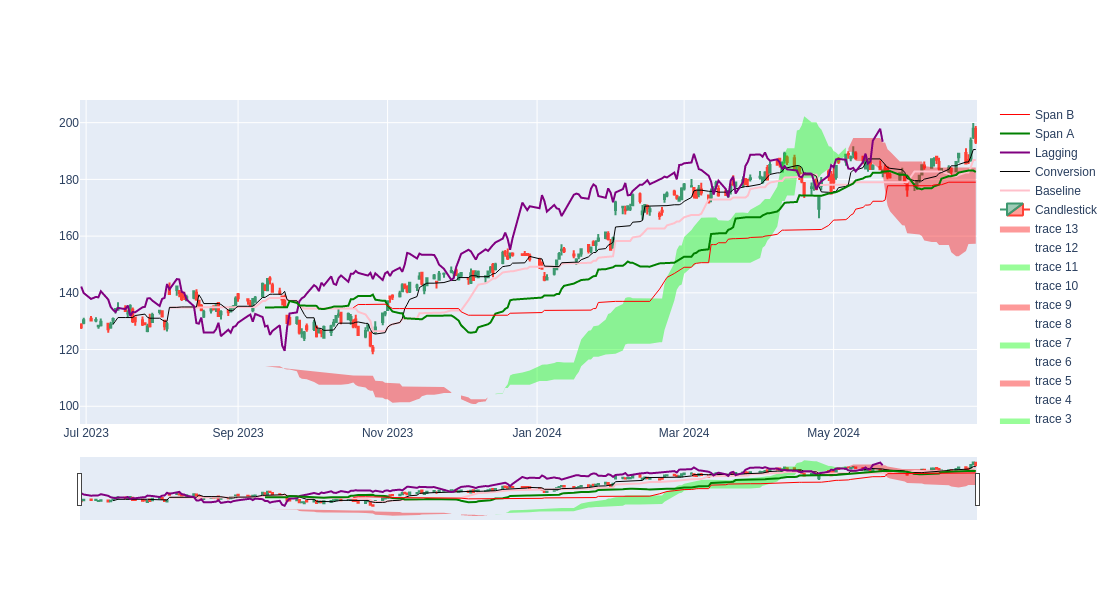

In [14]:
get_Ichimoku('AMZN')